In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

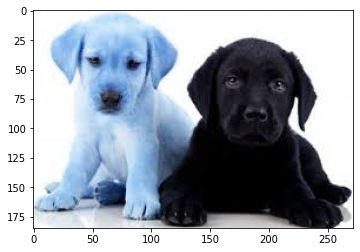

In [ ]:
image = cv2.imread("/content/dogs.jpeg")
image
plt.imshow(image)

In [ ]:
twodim = image.reshape((-1,3))
twodim = np.float32(twodim)
twodim

array([[240., 240., 240.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [254., 254., 254.],
       [254., 254., 254.],
       [254., 254., 254.]], dtype=float32)

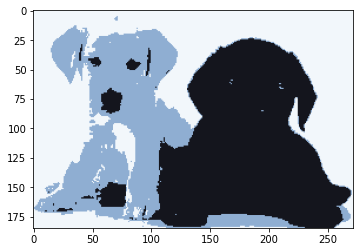

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
 
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(twodim, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

In [ ]:
r = []
g = []
b = []
for line in image:
  for pixel in line:
    temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)
df = pd.DataFrame({'red': r,
                   'blue': b,
                   'green': g})


In [ ]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
35814,0,0,0,0.000000,0.000000,0.000000
44055,21,18,20,0.203098,0.180572,0.196512
49256,242,228,233,2.340464,2.287248,2.289370
35671,237,164,202,2.292108,1.645214,1.984776
23648,255,255,255,2.466192,2.558107,2.505534
46330,251,196,219,2.427507,1.966231,2.151811
14253,191,86,130,1.847226,0.862734,1.277331
3138,255,255,255,2.466192,2.558107,2.505534
33421,38,29,28,0.367511,0.290922,0.275117
17115,255,255,255,2.466192,2.558107,2.505534


In [ ]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

In [ ]:
print(cluster_centers)

[[2.30639328 2.19051335 2.09108404]
 [0.33239867 0.24906822 0.23463625]]


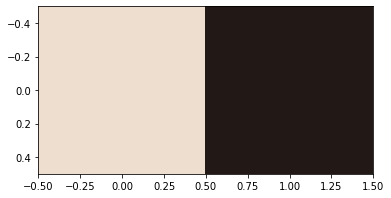

In [ ]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
  scaled_r, scaled_g, scaled_b = cluster_center
  colors.append((
      scaled_r * r_std / 255,
      scaled_g * g_std / 255,
      scaled_b * b_std / 255
      ))
plt.imshow([colors])
plt.show()
